# ML Assignment 6: Supervised Model Comparison and k-Means Clustering


 # 1. Supervised Learning Model Comparison 

- # Life Expectancy (WHO) Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Model Comparison Steps:-

# Step.1.	Initial Exploration and Pre-Processing

## 1.1.	Load the dataset and perform an initial exploration to understand its structure and content

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv") 
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.shape

(2938, 22)

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Feature Description

- Country - Name of the country.
- Year   
- Status - Country Developed or not.
- Life Expenrancy - How much of years a person live in the country
- Adult Mortality - probability of dying count of adult person (15-60)
- infant Deaths - babies death count,under 1 age 
- Alcohol - Alcohol consumption
- percentage expenditure
- Hepatitis B - immunization level for hepatitis
- Measles - Measles Cases
- BMI - body mass index
- under-five deaths - Death counts of under 5 age
- Polio - immunization level for polio
- Total expenditure
- Diphtheria - immunization level for Diphtheria
- HIV/AIDS - Death counts Due to HIV/AIDS]
- GDP
- Population
- thinness 1-19 years - underweight in those age groups.
- thinness 5-9 years - underweight in those age groups.
- Income composition of resources - Income of the population
- Schooling 

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 1.2.	Determine the number of unique values in the 'Country' and 'Year' columns.

In [8]:
print(f"Number Of Unique Country : {df["Country"].nunique()}")
print(f"Number Of Unique Year : {df["Year"].nunique()}")

Number Of Unique Country : 193
Number Of Unique Year : 16


## 1.3.	Analyze the distribution of values in the 'Status' column. If the dataset is imbalanced, consider using appropriate metrics for evaluation.

In [9]:
df["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

- it looks like there is imbalance in the data.

## 1.4.	Check for any missing values. Impute missing values for all numerical columns using the median or another suitable strategy.

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## 1.4.	Check for any missing values. Impute missing values for all numerical columns using the median or another suitable strategy

- looks like all the missing values are only in numerical columns, so we’ll use the median to fill them.

In [11]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna(df[column].median())

In [12]:
df.isnull().sum() # Cross check missing values

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## 1.5.	Optionally, you may perform a comprehensive EDA to visualize relationships, distributions, and patterns in the data.

In [13]:
Numeric_col = df.select_dtypes(include=["int64","float64"]).columns

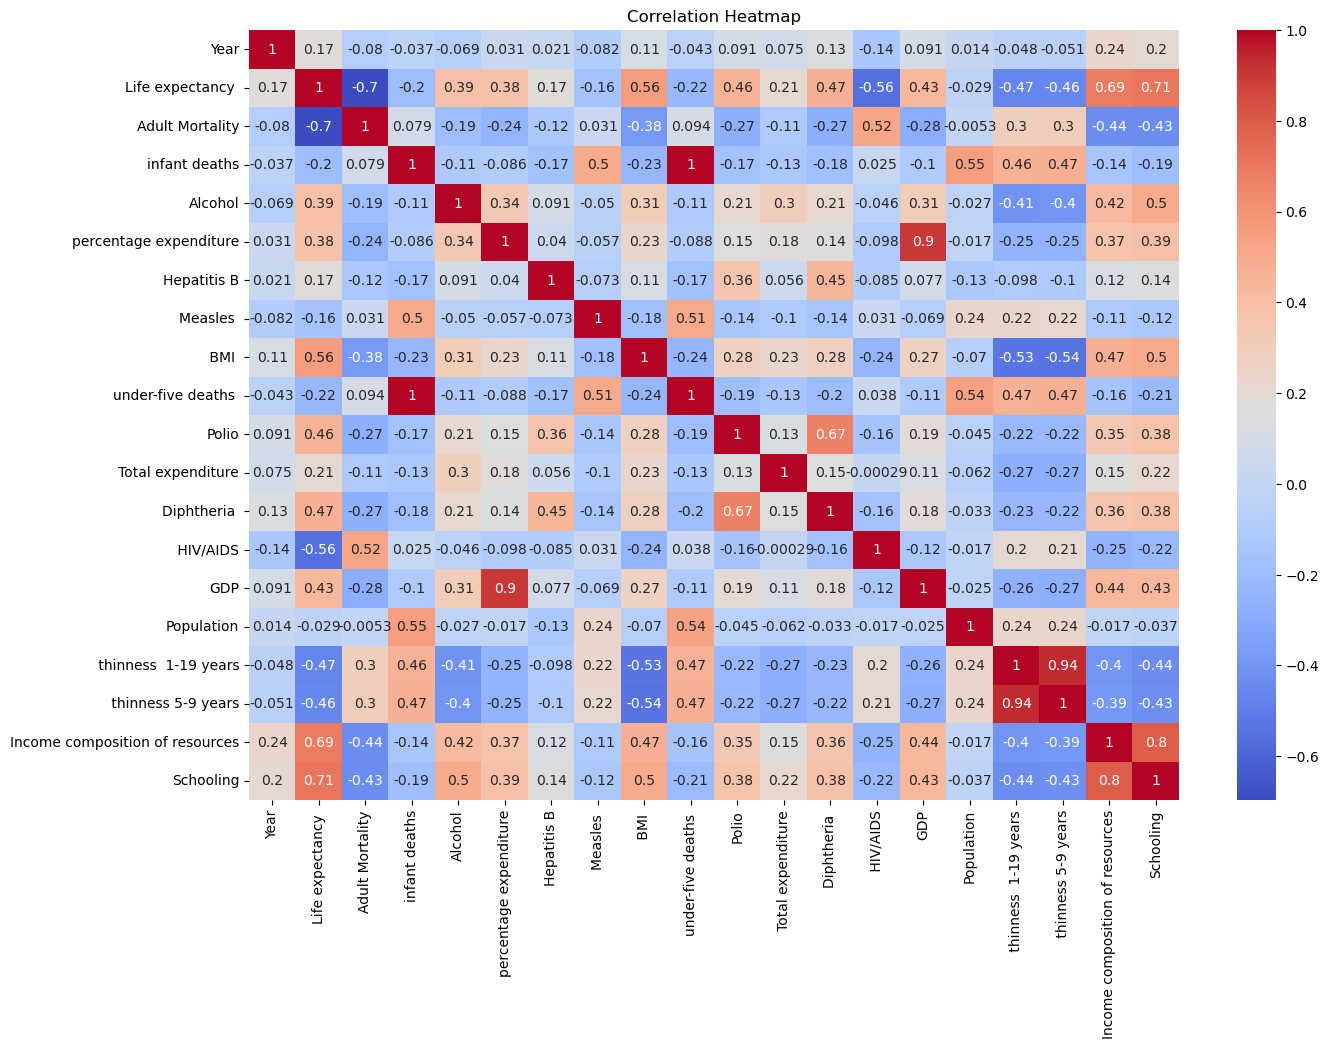

In [14]:
# finding cor-relations between the features
plt.figure(figsize=(15,10))
sns.heatmap(df[Numeric_col].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- look like there is high corelated features are (percentage expenditure and GDP), (under-five deaths and infant deaths),(thinness 1-19 year and thinness 5-9 years). We can remove any one of the feature for our Model pretiction to avoid model overfitting .

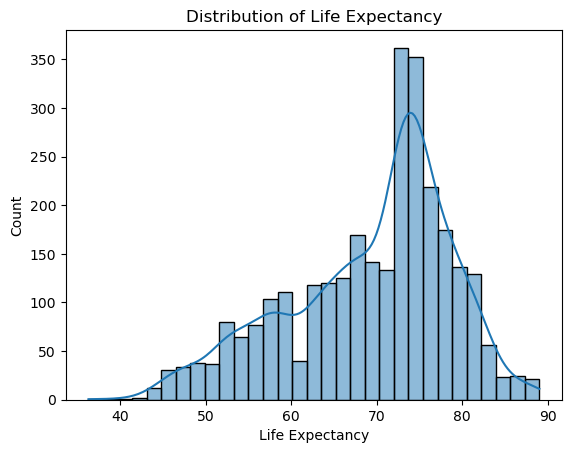

In [15]:
# distribution of people life range
sns.histplot(df['Life expectancy '], kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.show()

- Majority of population live around 72 to 75 years

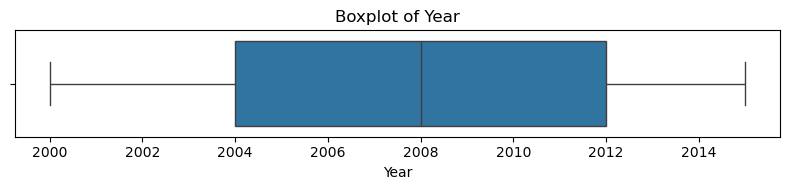

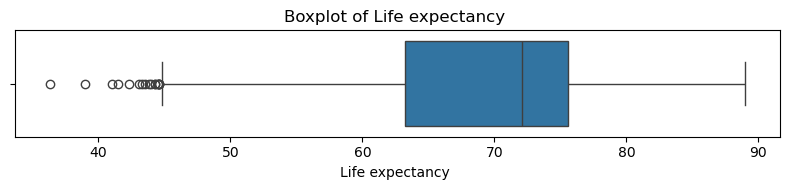

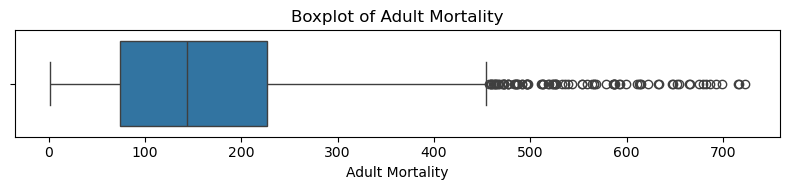

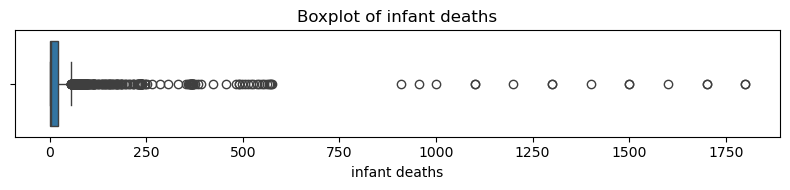

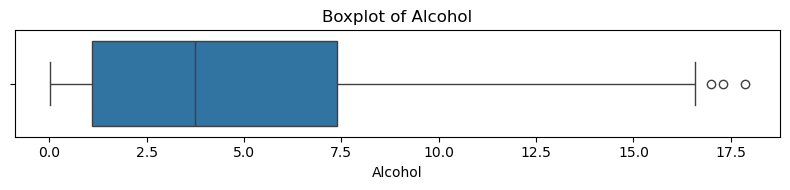

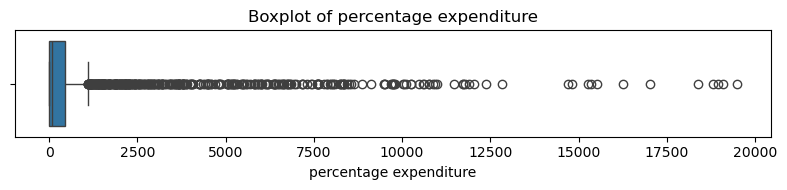

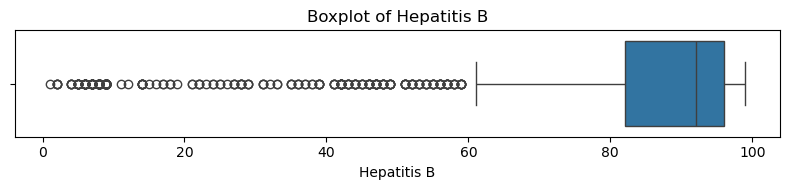

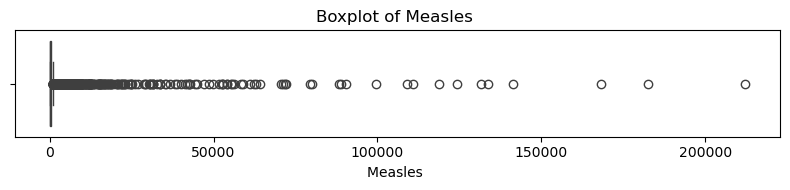

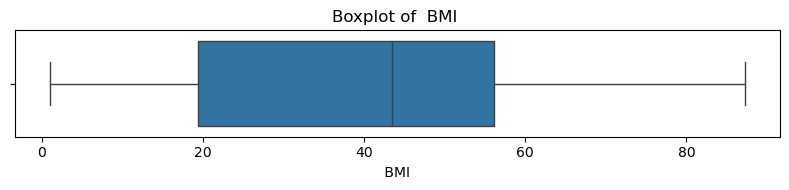

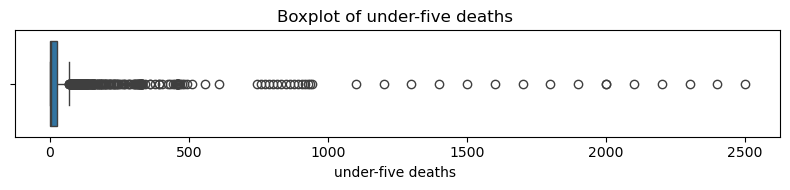

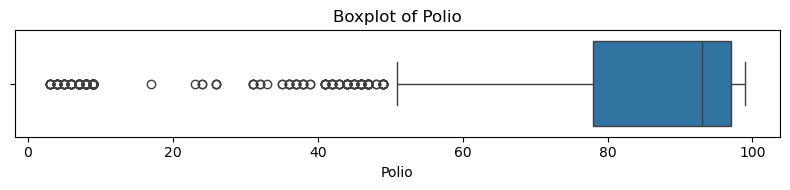

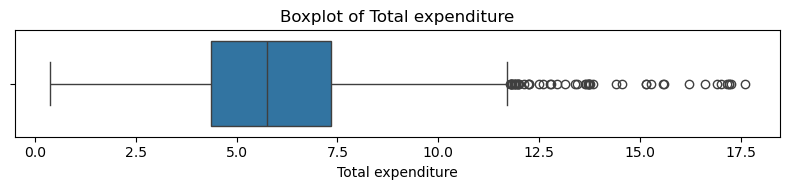

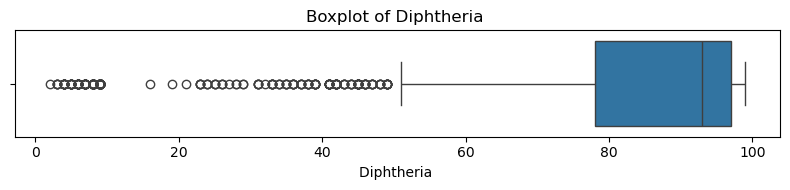

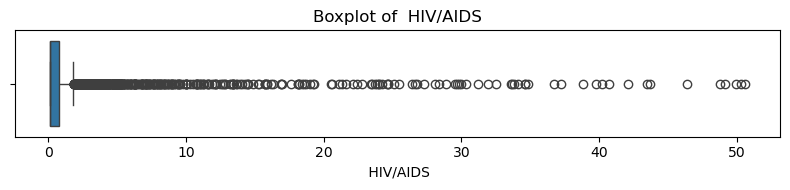

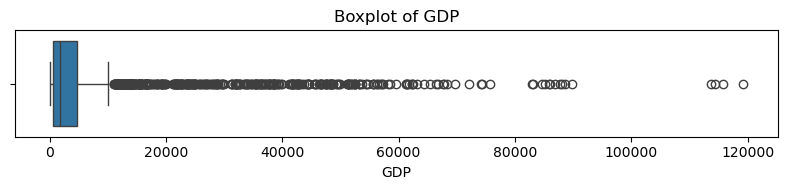

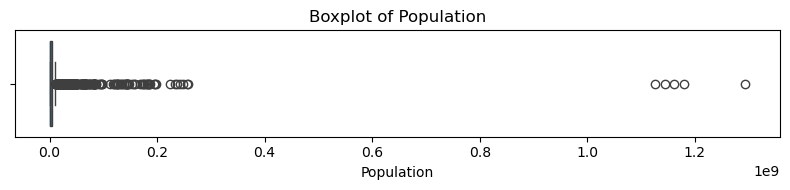

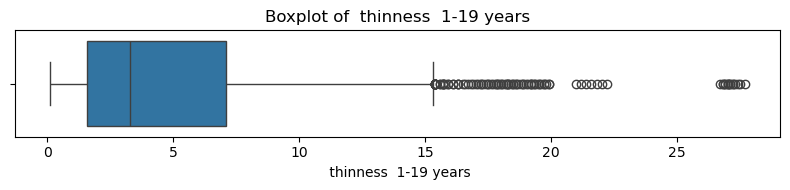

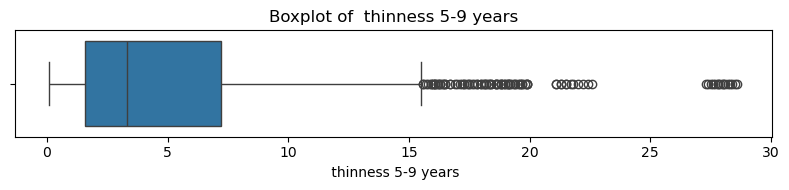

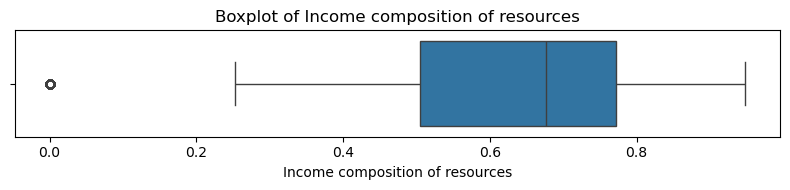

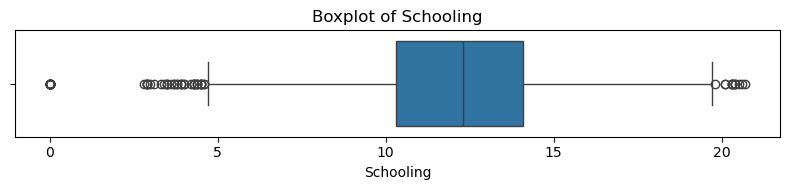

In [16]:
# finding Outliers
for col in Numeric_col:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

- It looks like there are some outliers in the dataset, but we can't remove all of them as it might affect our model's predictions.

## 1.6.	Encode categorical columns appropriately.

In [17]:
from sklearn.preprocessing import LabelEncoder

#Encoding Catagerical Columns "Status" 
print(f'Status Before Encoding {df["Status"].unique()}')
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])
print(f"Status After Encoding {df["Status"].unique()}")

#Encoding Categerical Columns "Country"
df["Country"] = le.fit_transform(df["Country"])
print(f"Total Country {df["Country"].nunique()}")

df.head()

Status Before Encoding ['Developing' 'Developed']
Status After Encoding [1 0]
Total Country 193


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Step-2.Classification Models Comparison

## 2.1.	Define 'Status' as the target variable and use all other columns as features.

In [18]:
X = df.drop(["Status","percentage expenditure","under-five deaths "," thinness  1-19 years"],axis=1) # remove Co-Realted Features for Avoid Overfitting
y = df["Status"]

## 2.2.	Split the data into training and testing sets.

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 2.3.	Scale all feature columns, excluding 'Country' and 'Year'.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

exclede_feature = ["Country","Year"] 

# Add Scaled columns in the list
col_to_scaled = []
for col in X_train.columns:
    if col not in exclede_feature:
        col_to_scaled.append(col)
print(X_train[col_to_scaled].columns)

# Scaling Other Features 
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[col_to_scaled] = scaler.fit_transform(X_train[col_to_scaled])
X_test_scaled[col_to_scaled] = scaler.transform(X_test[col_to_scaled])

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [21]:
X_train_scaled.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
456,27,2007,0.315334,-0.317897,-0.257514,0.190458,0.563355,-0.200110,-0.656964,0.654218,-0.673352,0.655670,-0.225454,-0.260124,-0.187719,0.713012,-0.156704,-0.043973
462,27,2001,0.388589,-0.109963,-0.257514,-0.186311,0.387715,-0.200110,-0.827298,0.353816,-0.303862,-3.094625,-0.187469,-0.399210,-0.188598,1.004549,-0.354789,-0.320601
2172,143,2011,0.556029,-0.181940,-0.257514,1.510432,0.695084,-0.200110,0.294898,0.697132,0.688363,0.697808,-0.320418,-0.361631,-0.169197,-0.116749,0.492024,0.263392
2667,175,2013,0.587424,-1.221608,-0.230683,-0.832201,0.651174,-0.198729,1.036349,0.654218,0.555512,0.655670,-0.320418,-0.178096,-0.174794,0.331771,0.427646,0.816648
381,23,2002,0.576959,-0.565817,-0.257514,-1.129516,0.695084,-0.200110,-0.531719,0.697132,-1.046993,0.487117,-0.320418,0.776108,-0.169197,0.286919,0.922859,0.386338


#### 2.4.	Compare classification models including Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier, Gaussian Naive Bayes, and XGBoost. Report both accuracy and F1-scores for each model. Optionally, you may perform hyperparameter tuning to optimize model performance.

In [22]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,f1_score,r2_score,mean_absolute_error,mean_squared_error

In [24]:
# Store in dictionary
Classifier_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear',max_iter=1000),
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=6,random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=7,random_state=42),
    "SVM": SVC(),
    "Gaussian NB": GaussianNB(),
    "XGBoost": XGBClassifier()}
# to store result
results = []

# Train and evaluate model
for name, model in Classifier_models.items():
    model.fit(X_train_scaled, y_train)
    model_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred,average='weighted') # weghted for imbalance data
    
    results.append((name, acc, f1))
    print(f"{name}: Accuracy = {acc:.2f}, F1-Score = {f1:.2f}")

Logistic Regression: Accuracy = 0.94, F1-Score = 0.94
KNN (K=5): Accuracy = 0.98, F1-Score = 0.98
Decision Tree: Accuracy = 0.97, F1-Score = 0.97
Random Forest: Accuracy = 0.99, F1-Score = 0.99
SVM: Accuracy = 0.84, F1-Score = 0.76
Gaussian NB: Accuracy = 0.79, F1-Score = 0.81
XGBoost: Accuracy = 0.99, F1-Score = 0.99


## 2.5.	Identify and report the best-performing classification model for this dataset.

#### Top Model 

- Random Forest Model and the XGBoosting Model Performing well in this case.
- Both Models have an Accuracy and F1score of around 0.99

# Step-3.	Regression Models Comparison

## 3.1.	Define 'Life expectancy' as the target variable and use all other columns as features.

In [25]:
X1 = df.drop(["Life expectancy ","percentage expenditure","under-five deaths "," thinness  1-19 years"],axis=1)#remove Co-Realted Features for Avoid Overfitting
y1 = df["Life expectancy "]

## 3.2.	Split the data into training and testing sets.

In [26]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=42)

## 3.3.	Scale all feature columns, excluding 'Country', 'Year', and 'Status'.

In [27]:
exclede_feature1 = ["Country","Year","Status"] 

# Add Scaled columns in the list
col_to_scaled1 = []

for col in X_train1.columns:
    if col not in exclede_feature1:
        col_to_scaled1.append(col)
print(X_train1[col_to_scaled1].columns)

# Scaling Other Features 
X_train_scaled1 = X_train1.copy()
X_test_scaled1 = X_test1.copy()

X_train_scaled1[col_to_scaled1] = scaler.fit_transform(X_train1[col_to_scaled1])
X_test_scaled1[col_to_scaled1] = scaler.transform(X_test1[col_to_scaled1])

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


## 3.4.	Compare regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and K-Neighbors Regressor. Report R² score and Mean Absolute Error for each model. Optionally, you may perform hyperparameter tuning to enhance performance.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [29]:
# Store in dictionary
Regressor_models = {
    "linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=6,random_state=42),
    "Random Forest Regressor": RandomForestRegressor(max_depth=7,random_state=42),
    "SVM": SVR(),
    "KNN (K=5)": KNeighborsRegressor(n_neighbors=1)}
# to store result
results1 = []

# Train and evaluate model
for name, model in Regressor_models.items():
    model.fit(X_train_scaled1, y_train1)
    model_pred1 = model.predict(X_test_scaled1)
    
    R2_score = r2_score(y_test1, model_pred1)
    MAE = mean_absolute_error(y_test1,model_pred1)
    
    results.append((name, R2_score, MAE))
    print(f"{name}: R2_Score = {R2_score:.2f}, MAE-Score = {MAE:.2f}")

linear Regression: R2_Score = 0.81, MAE-Score = 2.95
Decision Tree Regressor: R2_Score = 0.92, MAE-Score = 1.85
Random Forest Regressor: R2_Score = 0.96, MAE-Score = 1.39
SVM: R2_Score = -0.11, MAE-Score = 7.50
KNN (K=5): R2_Score = 0.90, MAE-Score = 1.37


## 3.5.	Identify and report the best-performing regression model for this dataset.

#### Top Model
- Random Forest Model Performing well on this dataset.
- R2_score and Mean_absolute_error are better compared with other Models.

# 2. Unsupervised Learning – k-Means

# Customer Segmentation

In [30]:
CS_df = pd.read_csv(r"https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv")
CS_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
CS_df.shape

(200, 5)

In [32]:
CS_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Step 1. k-Means Clustering Steps:

#### ➔	Initial Visualization: Create a scatter plot using 'Annual Income (k$)' on the x-axis and 'Spending Score (1-100)' on the y-axis to visualize the data distribution.

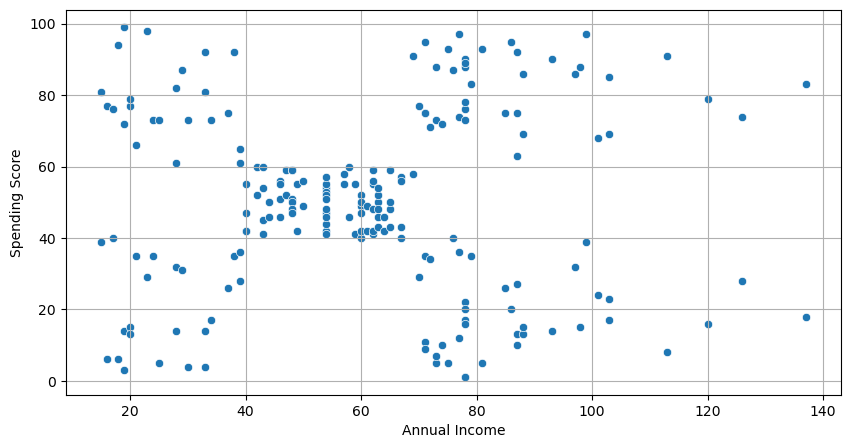

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=CS_df,x="Annual Income (k$)",y="Spending Score (1-100)",markers="*")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

#### ➔	Feature Selection: Select 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for k-Means clustering.

In [34]:
X_c = CS_df[["Annual Income (k$)","Spending Score (1-100)"]]

X_c_scaled = scaler.fit_transform(X_c)

#### ➔	Determine Optimal k-Value: Calculate the Within-Cluster Sum of Squares (WCSS) for a range of k-values

In [35]:
from sklearn.cluster import KMeans

WCSS =[]
K_range = range(1,11)

for k in K_range:
    K_means = KMeans(n_clusters=k,init= "k-means++",random_state=42)
    K_means.fit(X_c_scaled)
    WCSS.append(K_means.inertia_)

print(WCSS)

[400.0, 273.66888662642015, 157.70400815035947, 109.22822707921347, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.319122878338824, 32.49508119910091, 30.05932269404221]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

#### ➔	Plot the Elbow Chart: Plot the elbow method graph to visually determine the optimal k-value.

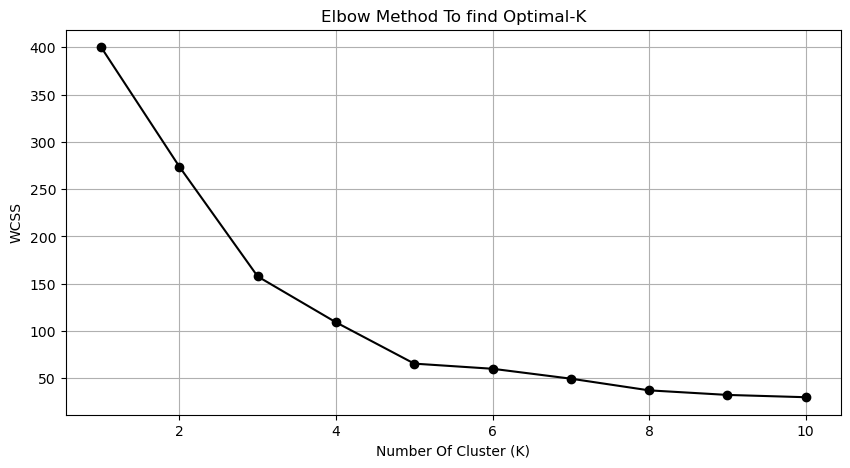

In [36]:
plt.figure(figsize=(10,5))
plt.plot(K_range,WCSS,"ko-")
plt.title("Elbow Method To find Optimal-K")
plt.xlabel("Number Of Cluster (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

- The Elbow is at K= 5

#### ➔	Build k-Means Model:

In [37]:
K_means = KMeans(n_clusters=5,init= "k-means++",random_state=42)
y_kmeans=K_means.fit_predict(X_c_scaled)

CS_df["Cluster"]=y_kmeans
CS_df.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [38]:
CS_df["Cluster"].unique()

array([4, 2, 0, 1, 3])

In [39]:
Centroids=K_means.cluster_centers_
Centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(X_c_scaled,CS_df["Cluster"])

0.5546571631111091

## ➔	Visualization of Clusters: 

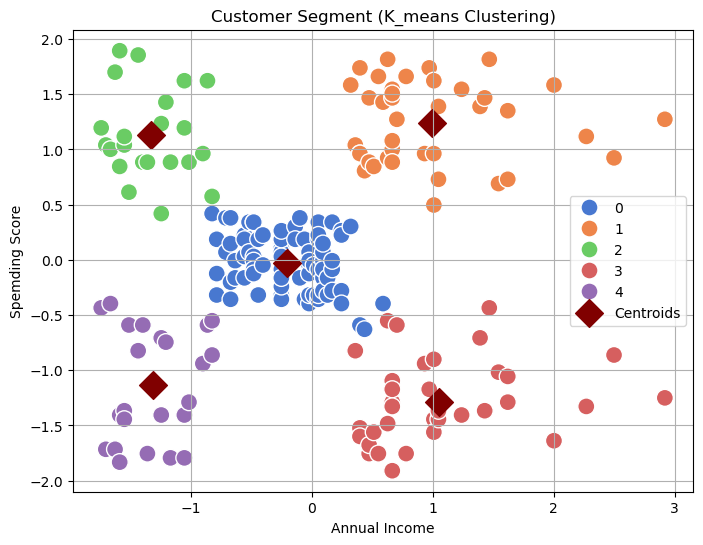

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_c_scaled[:,0],y=X_c_scaled[:,1],hue=y_kmeans,palette="muted",s=150)
plt.scatter(Centroids[:,0],Centroids[:,1],marker="D",s=200,c="maroon",label="Centroids")
plt.title("Customer Segment (K_means Clustering)")
plt.xlabel("Annual Income")
plt.ylabel("Spemding Score")
plt.legend()
plt.grid(True)
plt.show()

- The Model clearly SHows Well-structured clusters.clearly separating customer segments based on Annual Income and Spending Score.